# __Assignment #3: Online Shoppers Intention__


# <font color='blue'>__File #1: Rand Score analysis__</font>
# Author: Andrés Leiva-Araos
---

## __Preamble__

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ML
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import MinMaxScaler

# Metrics
from sklearn.metrics.cluster import rand_score

In [40]:
file_path = './data'

In [41]:
!pwd

/Users/andresleivaaraos/Library/Mobile Documents/com~apple~CloudDocs/_UNF-MSc/ML/Assignment-3


## __EDA__

### __Reading from the source__
The idea is to undestand the data at origin. See its columns and type strcutrure. This is an alternative way to load the data.

In [42]:
df = pd.read_csv(file_path + '/online_shoppers_intention.csv')
df.sample(5).T

,7000,11819,14,2707,6440
Administrative,0,0,0,0,0
Administrative_Duration,0.0,0.0,0.0,0.0,0.0
Informational,0,0,0,0,0
Informational_Duration,0.0,0.0,0.0,0.0,0.0
ProductRelated,4,18,2,1,2
ProductRelated_Duration,39.2,315.694444,68.0,0.0,30.4
BounceRates,0.0,0.0,0.0,0.2,0.0
ExitRates,0.05,0.002941,0.1,0.2,0.066667
PageValues,0.0,0.0,0.0,0.0,21.478995
SpecialDay,0.0,0.0,0.0,0.0,0.0


### Data description

This dataset has 18 columns and 12,330 rows. The 18 attributes include 4 categorical
and 14 numerical attributes. The last attribute “Revenue” is the class label: “FALSE” means
not ending up shopping, and “TRUE” means ending up shopping. The meaning of the other
attributes are the following.
“Administrative”, “Administrative Duration”, “Informational”, “Informational Duration”,
“Product Related” and “Product Related Duration” represent the number of different types of
pages visited by the visitor in that session and total time spent in each of these page categories.
The values of these features are derived from the URL information of the pages visited by
the user and updated in real time when a user takes an action, e.g. moving from one page to
another.

The “Bounce Rate”, “Exit Rate” and “Page Value” features represent the metrics measured
by “Google Analytics” for each page in the e-commerce site. The value of “Bounce
Rate” feature for a web page refers to the percentage of visitors who enter the site from that
page and then leave (“bounce”) without triggering any other requests to the analytics server
during that session.

The value of “Exit Rate” feature for a specific web page is calculated as for all page views
to the page, the percentage that were the last in the session. The “Page Value” feature represents
the average value for a web page that a user visited before completing an e-commerce
transaction.

The “Special Day” feature indicates the closeness of the site visiting time to a specific
special day (e.g. Mothers Day, Valentine’s Day) in which the sessions are more likely to
be finalized with transaction. The value of this attribute is determined by considering the
dynamics of e-commerce such as the duration between the order date and delivery date. For
example, for Valentins day, this value takes a nonzero value between February 2 and February
12, zero before and after this date unless it is close to another special day, and its maximum
value of 1 on February 8. The dataset also includes operating system, browser, region, traffic
type, visitor type as returning or new visitor, a Boolean value indicating whether the date of
the visit is weekend, and month of the year.

## __Data engineering__

In [43]:
# Turning Weekend and Revenue into 0 and 1
df['Weekend'] = df['Weekend'].map({False: 0, True: 1})
df['Revenue'] = df['Revenue'].map({False: 0, True: 1})


In [44]:
# Calculate the mean target encoding for "Month"
mean_encoding_month = df.groupby('Month')['Revenue'].mean().to_dict() 
df['Month'] = df['Month'].map(mean_encoding_month)

# Calculate the mean target encoding for "VisitorType"
mean_encoding_visitor_type = df.groupby('VisitorType')['Revenue'].mean().to_dict() 
df['VisitorType'] = df['VisitorType'].map(mean_encoding_visitor_type) 


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  float64
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [46]:
df.sample(5).T

,11170,8625,10245,465,6110
Administrative,0.000000,0.000000,12.000000,5.000000,0.000000
Administrative_Duration,0.000000,0.000000,209.375000,97.500000,0.000000
Informational,0.000000,4.000000,0.000000,0.000000,2.000000
Informational_Duration,0.000000,52.500000,0.000000,0.000000,101.700000
ProductRelated,30.000000,38.000000,43.000000,24.000000,42.000000
ProductRelated_Duration,953.666667,2533.008333,2754.117424,758.144444,1892.198319
BounceRates,0.026667,0.000000,0.004687,0.040000,0.000000
ExitRates,0.071111,0.026190,0.033875,0.059846,0.004545
PageValues,0.000000,0.000000,13.681089,0.000000,153.577697
SpecialDay,0.000000,0.000000,0.000000,0.000000,0.000000


## __Scaling__
We need to scale the data because both algorith benefit from this. Features with larger numerical ranges (e.g., `ProductRelated_Duration`, `ProductRelated`) could disproportionately influence the distance calculations, leading to clusters that reflect the scale of the data rather than its inherent structure. Therefore, scaling helps ensure that all features are treated equally, allowing the clustering algorithm to more accurately reflect the natural groupings in the data.


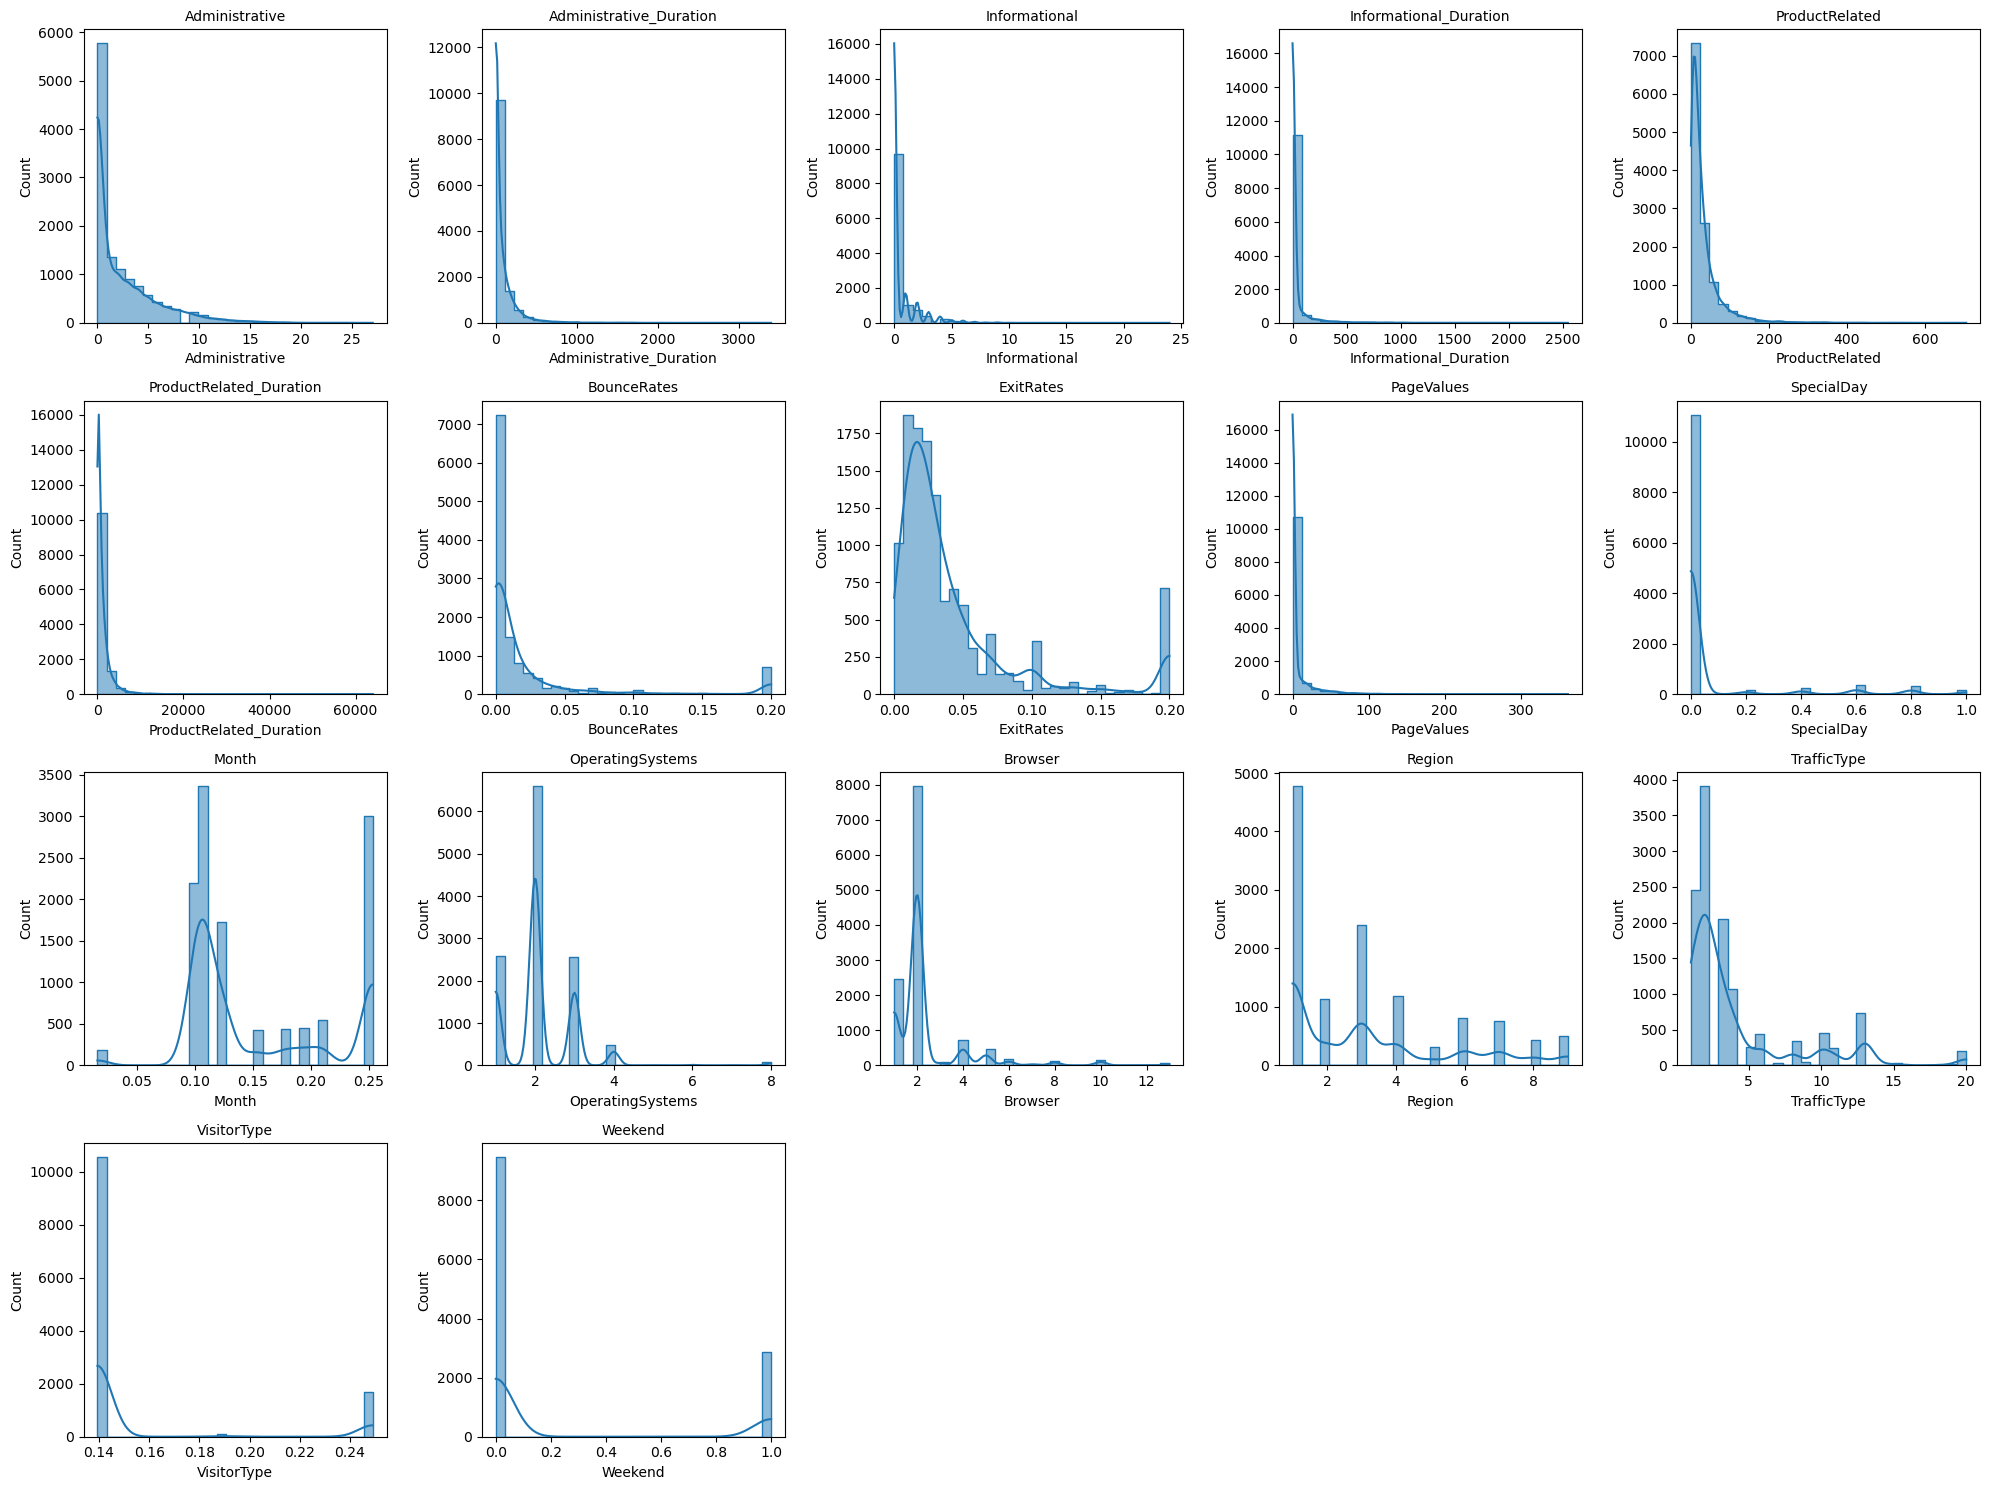

In [47]:
# Exclude 'Revenue' from the columns to be plotted
columns_to_plot = df.columns[:-1]  # Excludes the last column 'Revenue'

# Data distributions
# Adjusting the subplot grid size if necessary
fig, axes = plt.subplots(4, 5, figsize=(20, 15))  # You may adjust the figsize if needed

# Iterate over the columns to be plotted
for i, col in enumerate(columns_to_plot):
    # Select the subplot based on the index
    ax = axes[i // 5, i % 5]

    # Plot the histogram for the current column
    sns.histplot(data=df, x=col, bins=30, ax=ax, kde=True, element="step")

    # Set the title for the subplot
    ax.set_title(col, fontsize=10)  # Adjust fontsize as needed for better readability

# Hide any unused subplots
for j in range(i + 1, 20):  # Start hiding from the next subplot index
    fig.delaxes(axes[j // 5, j % 5])

plt.tight_layout()
plt.savefig('./img/distributions.png', format='png', dpi=300)
# Show the plot
plt.show()


None of the features show a normal distribution after a visual inspection; so for simplicity, we will apply `MinMaxScaler` function.

In [48]:
# Create an instance of MinMaxScaler
scaler = MinMaxScaler()

# Select the features to be scaled
features_to_scale = ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 
                     'ProductRelated', 'ProductRelated_Duration', 'PageValues', 'SpecialDay', 'OperatingSystems',
                     'Browser', 'Region', 'TrafficType']

# Scale the selected features
df[features_to_scale] = scaler.fit_transform(df[features_to_scale])


In [49]:
df.sample(5).T

,12171,672,4366,1346,7192
Administrative,0.037037,0.111111,0.000000,0.111111,0.259259
Administrative_Duration,0.003384,0.003335,0.000000,0.441213,0.060051
Informational,0.041667,0.000000,0.000000,0.041667,0.000000
Informational_Duration,0.036872,0.000000,0.000000,0.072959,0.000000
ProductRelated,0.139007,0.028369,0.009929,0.043972,0.007092
ProductRelated_Duration,0.097115,0.004727,0.002728,0.045424,0.002012
BounceRates,0.024163,0.000000,0.042857,0.000000,0.000000
ExitRates,0.033992,0.002381,0.066667,0.010215,0.012500
PageValues,0.000000,0.000000,0.000000,0.000000,0.000000
SpecialDay,0.000000,0.000000,0.000000,0.000000,0.000000


## __K-Means__

K-means clustering, one of the simplest and most popular unsupervised machine learning algorithms, was first proposed by Stuart Lloyd of Bell Labs in 1957 as a technique for pulse-code modulation, but it was not until 1967 that James MacQueen introduced the name "k-means" for data clustering analysis. Its widespread adoption across various fields stems from its simplicity and efficiency in grouping data into k distinct clusters based on feature similarity. It partitions $n$ observations into $k$ clusters, where each observation belongs to the cluster with the nearest mean, serving as a prototype of the cluster. This algorithm is commonly used for market segmentation, document clustering, image segmentation, and more, where the aim is to group data points into distinct clusters without pre-labeled responses.

**Pros:**
- **Simple and fast:** It's easy to understand and implement, making it suitable for large datasets.
- **Efficient:** Works well when clusters have a spherical shape.

**Cons:**
- **Choosing $k$:** The number of clusters $k$ needs to be set before the algorithm starts, which can be a challenge without prior knowledge of how many clusters there should be.
- **Sensitivity to initial conditions:** The final clusters depend on the initial random selection of centroids, leading to potentially different outcomes for different runs.
- **Outliers and Noise:** K-Means is sensitive to outliers and noise since a few such data points can significantly alter the position of the centroids.
- **Cluster shapes:** Assumes clusters are of similar size and density, struggling with elongated or irregularly shaped clusters.

**Algorithmic Complexity:**
The time complexity of the K-Means algorithm is $O(n \cdot k \cdot i)$), where $n$ is the number of data points, $k$ is the number of clusters, and $i$ is the number of iterations required for convergence. While this is generally efficient, the need for multiple iterations over large datasets can become computationally intensive.

In [60]:
# Exclude the "Revenue" column from the dataset
X_cluster = df.drop("Revenue", axis=1)

# Apply K-means clustering with k=4
kmeans = KMeans(n_clusters=4,
                n_init='auto', # This is the default
                random_state=18)
kmeans.fit(X_cluster)

# Get the cluster labels for each data point
cluster_labels = kmeans.labels_

# Add the cluster labels as a new column in the dataset
df["KMeans-Cluster"] = cluster_labels

## __Complete-Linkage Agglomerative Nesting (CLAN)__
Complete-linkage clustering, part of hierarchical agglomerative clustering (HAC) methods, forms clusters by iteratively merging pairs of clusters that have the smallest maximum pairwise distance between their elements. Introduced as part of the broader HAC framework in the 1950s and 1960s, complete-linkage specifically focuses on the maximum distance, which tends to create more compact and well-separated clusters compared to other linkage criteria. This method is valuable for its interpretability and the dendrogram visualization it supports, providing insights into the data structure at different scales. However, its computational complexity and sensitivity to outliers can pose challenges, especially with large datasets.

Complete-Linkage Agglomerative Nesting (CLAN) is a hierarchical clustering technique that measures the similarity between two clusters based on the maximum distance between their individual components. It's used to group objects in a dataset into a tree of clusters. Unlike other linkage criteria, such as single-linkage that considers the closest points (minimum distance) between clusters, complete-linkage takes the furthest points (maximum distance), ensuring a more conservative approach to cluster similarity. This method is particularly useful in identifying well-separated and compact clusters.

__Pros__ 
- ITndency to create more uniformly sized clusters.
- High sensibility to outliers, often resulting in tighter clusters. 
- Can detect spherical clusters well.
- Less susceptible to noise and outliers compared to other linkage methods.
- Does not require a predetermined number of clusters.

__Cons:__
- Tends to form clusters of roughly equal size, which might not be desirable in all situations.
- Not suitable for finding clusters of varying densities.
- Higher computational cost compared to other linkage methods, making it less scalable for large datasets.
- __Chaining phenomenon:__ This phenomenon occurs when objects form a kind of chain or sequence across the dataset, with each object being close to the next, but the first and last objects in the chain being far apart. In complete-linkage clustering, as long as the furthest members of two clusters are sufficiently close to merge, the clusters will join, potentially leading these distant chain-ends to end up in the same cluster. This means that while each object in the cluster is close to one or more other objects in the cluster, there might be pairs of objects within the cluster that are very dissimilar to each other, linked only through a sequence of intermediary objects. This can somewhat contradict the goal of clustering to group together objects that are similar across all pairs in a cluster.

- __Algoritmic complexity__: it can be computationally intensive for large datasets due to its algorithmic complexity, which is typically $O(n^3)$ in time and $O(n^2)$ in space, where $n$ is the number of items being clustered. This makes it less scalable compared to more efficient clustering algorithms. Additionally, it may form clusters where objects in the same cluster could be very dissimilar if they're indirectly linked through a chain of intermediate objects.

In [56]:
# Apply complete-linkage agglomerative clustering with n_clusters=4
clustering = AgglomerativeClustering(n_clusters=4) 
cluster_labels = clustering.fit_predict(X_cluster)

# Add the cluster labels as a new column in the dataset
df["CLAN-Cluster"] = cluster_labels

In [61]:
df.sample(5).T

,2007,6826,9206,2407,8350
Administrative,0.000000,0.037037,0.074074,0.000000,0.000000
Administrative_Duration,0.000000,0.005649,0.019860,0.000000,0.000000
Informational,0.000000,0.000000,0.000000,0.000000,0.000000
Informational_Duration,0.000000,0.000000,0.000000,0.000000,0.000000
ProductRelated,0.002837,0.015603,0.015603,0.075177,0.045390
ProductRelated_Duration,0.000234,0.010371,0.004596,0.011184,0.011712
BounceRates,0.000000,0.000000,0.000000,0.022642,0.000000
ExitRates,0.100000,0.000000,0.009091,0.036298,0.006250
PageValues,0.000000,0.000000,0.000000,0.000000,0.000000
SpecialDay,0.000000,0.000000,0.000000,1.000000,0.000000


## __Rand Index__

The Rand Index (RI) is a measure used to evaluate the similarity between two data clusterings. Specifically, it assesses the agreement between a pair of clusterings—one given by the algorithm and one that is typically the ground truth or a benchmark clustering.

**Formula:**
The formula for the Rand Index is given by:

$$RI = \frac{2(|S| + |D|)}{m(m-1)} $$

where:
- $S$ is the set of element pairs that are in the same cluster in both clusterings.
- $D$ is the set of element pairs that are in different clusters in both clusterings.
- $m$ is the total number of elements being clustered.

**Usage:**
- The RI is particularly useful when you have a "gold standard" clustering and want to measure how closely the clustering produced by your algorithm matches this standard.
- It is often used in tasks like document clustering, genetic clustering, or when the clusters formed by community detection in networks are to be validated.

**Characteristics:**
- The RI value ranges from 0 to 1, where 1 signifies perfect agreement between the two clusterings, and 0 indicates no agreement.
- It is a pair-counting measure, as it counts pairs of elements that are correctly assigned to the same or different clusters.

**When to Use:**
- When the actual clusters (ground truth) are known and you need a metric to compare the algorithmic clusters to these.
- It is useful for both validating the results of a clustering algorithm and comparing the performance of different algorithms.
- Unlike some other measures, the RI does not penalize the number of clusters, so it can be used for comparing clustering algorithms that may produce different numbers of clusters.

**Interpretation:**
- A high Rand Index indicates that the clustering algorithm has performed well in terms of matching the ground truth.
- A low Rand Index suggests that there are significant discrepancies between the clustering algorithm's output and the ground truth.

In practice, while the Rand Index is intuitive and widely used, it has some limitations. For instance, it may generate high scores for random cluster assignments in certain structured datasets, and it doesn't account for chance agreement. Hence, adjusted versions of the Rand Index, like the Adjusted Rand Index, are often preferred as they normalize for the effect of chance.The Rand Index (RI) is a measure of the similarity between two data clusterings. It is used for evaluating the performance of clustering algorithms when the true labels are known, which makes it a form of external cluster validation.


In [62]:
# Calculate the Rand Index between "Revenue" and "KMeans-Cluster"
ri_kmeans = rand_score(df['Revenue'], df['KMeans-Cluster'])

# Calculate the Rand Index between "Revenue" and "Agglomerative-Cluster"
ri_clan = rand_score(df['Revenue'], df['CLAN-Cluster'])

print(f'Rand Index for K-Means: {ri_kmeans: 6.4f}')
print(f'Rand Index for CLAN: {ri_clan: 6.4f}')

Rand Index for K-Means:  0.4352
Rand Index for CLAN:  0.4405


### __Rationale__
The reported Rand Index for both K-Means and CLAN, standing at 0.4319 and 0.4405 respectively, suggests a measure of similarity between the cluster assignments produced by these algorithms and the ground truth, which has just two classes. Considering that both algorithms were configured with a predetermined cluster count ($k=4$) and subjected to the default parameter adjustments, even though the actual data is categorized into merely two classes, the CLAN algorithm shows a slightly more aligned result with the true classification compared to K-Means. The Rand Index scores indicate that while neither clustering perfectly aligns with the true labels, CLAN's approach results in a grouping that is slightly  more congruent with the actual class distribution, highlighting its relative efficacy in dealing with this dataset's specific clustering challenge.

## __Additional Experiments__

### __Using with `k=2` and some new hyper-parameters__

In [64]:
# Apply K-means clustering with k=2
kmeans = KMeans(n_clusters=2,
                algorithm='elkan',
                n_init=10,
                random_state=18)
kmeans.fit(X_cluster)

# Get the cluster labels for each data point
cluster_labels = kmeans.labels_

# Add the cluster labels as a new column in the dataset
df["KMeans-Cluster_k2"] = cluster_labels

In [65]:
# Apply complete-linkage agglomerative clustering with n_clusters=2
clustering = AgglomerativeClustering(n_clusters=2, 
                                     linkage='complete')
cluster_labels = clustering.fit_predict(X_cluster)

# Add the cluster labels as a new column in the dataset
df["CLAN-Cluster_k2"] = cluster_labels

In [66]:
df.sample(5).T

,6171,3458,588,4827,7585
Administrative,0.000000,0.000000,0.000000,0.000000,0.037037
Administrative_Duration,0.000000,0.000000,0.000000,0.000000,0.013358
Informational,0.000000,0.000000,0.000000,0.000000,0.000000
Informational_Duration,0.000000,0.000000,0.000000,0.000000,0.000000
ProductRelated,0.001418,0.015603,0.049645,0.019858,0.058156
ProductRelated_Duration,0.000000,0.011262,0.019245,0.019149,0.019191
BounceRates,0.200000,0.000000,0.005714,0.015385,0.019512
ExitRates,0.200000,0.045455,0.023619,0.015385,0.041057
PageValues,0.000000,0.000000,0.000000,0.000000,0.000000
SpecialDay,0.000000,0.000000,0.000000,0.000000,0.000000


In [68]:
# Calculate the Rand Index between "Revenue" and "KMeans-Cluster"
ri_kmeans_k2 = rand_score(df['Revenue'], df['KMeans-Cluster_k2'])

# Calculate the Rand Index between "Revenue" and "Agglomerative-Cluster"
ri_clan_k2 = rand_score(df['Revenue'], df['CLAN-Cluster_k2'])

print(f'Rand Index for K-Means with k=2: {ri_kmeans_k2: 6.4f}')
print(f'Rand Index for CLAN with k=2: {ri_clan_k2: 6.4f}')

Rand Index for K-Means with k=2:  0.5009
Rand Index for CLAN with k=2:  0.5592


As expected, hyperparameter tuning improves the results in both cases.